# This python script can be used to extract csv files from https://wazimap.co.za/

#### 1. First identify the chart/graph you are looking for (We'll use the download link for the chart/graph to extract the csv file from the website)
#### 2. Click on the 'Chart Option' you wish download and click 'Show Data'
#### 3. Right-click on 'Explore and download this data'
#### 4. Paste the link in the 'links' list below. Paste as many link as you wish between * ' * and seperate each link with a * , *

# PART 1 - EXTRACTION

#### The scripts below will extract all csv filed from links provided and save all of the csv files into a folder called 'CSV Files Combined'

In [18]:
import requests
import pandas as pd
import json
from bs4 import BeautifulSoup
import html5lib
import curl
import re
import urllib.request
import zipfile
import os
import glob
import shutil

In [4]:
def request_function(link):
    html_data = requests.get(link).text
    return html_data

In [5]:
def link_extractor(html_data):
    soup = BeautifulSoup(html_data, "html.parser")


    #find csv link

    csv_links = soup.find_all('a', href=re.compile("csv"))

    # cast bs4 result set to string    
    csv_links_string=str(csv_links)


    #create a list to contain the string
    csv_links_list = [csv_links_string]

    #use regex to split string - compile regular expression pattern
    quoted = re.compile(r'"[^"]*"')

    #iterate over list to extract the first set of double quotes within the string

    for value in csv_links_list:
    #use search method to find the pattern by parsign the values in the string
        match = quoted.search(value)
    #if there is a match, extract the string and group them. group(0) will find the first set of double quotes
        if match:
            extracted_string = match.group(0)
        
            if extracted_string != '_new':
                print(extracted_string)
            
            
    #remove " " at start and end            
    fix_url = extracted_string.replace('"', '')


    #use format method to add the missing part of the url            
    download_url = "https://wazimap.co.za/{}".format(fix_url)
    
    download = urllib.request.urlretrieve(download_url, "file.zip")


    # Open the ZIP file
    with zipfile.ZipFile("file.zip", "r") as z:
        # Extract the contents of the ZIP file to the current working directory
        z.extractall()
    
    #delete the zip file after it's been extracted
    zip_file_path = 'file.zip'
    os.remove(zip_file_path)
    

In [ ]:
#this is the list where all the download links is pasted
links = ['https://wazimap.co.za/data/table/?table=AGEINCOMPLETEDYEARSSIMPLIFIED&primary_geo_id=ward-19100115&geo_ids=ward-19100115,municipality-CPT,province-WC,country-ZA&release=2011',
         'https://wazimap.co.za/data/table/?table=GENDER&primary_geo_id=ward-19100115&geo_ids=ward-19100115,municipality-CPT,province-WC,country-ZA&release=2011',
         'https://wazimap.co.za/data/table/?table=TYPEOFDWELLING&primary_geo_id=ward-19100115&geo_ids=ward-19100115,municipality-CPT,province-WC,country-ZA&release=2011',
         'https://wazimap.co.za/data/table/?table=TENURESTATUS&primary_geo_id=ward-19100115&geo_ids=ward-19100115,municipality-CPT,province-WC,country-ZA&release=2011',
         'https://wazimap.co.za/data/table/?table=TYPEOFSECTOR&primary_geo_id=ward-19100115&geo_ids=ward-19100115,municipality-CPT,province-WC,country-ZA&release=2011',
         'https://wazimap.co.za/data/table/?table=HIGHESTEDUCATIONALLEVEL20&primary_geo_id=ward-19100115&geo_ids=ward-19100115,municipality-CPT,province-WC,country-ZA&release=2011',
         'https://wazimap.co.za/data/table/?table=EMPLOYEDINDIVIDUALANNUALINCOME&primary_geo_id=ward-19100115&geo_ids=ward-19100115,municipality-CPT,province-WC,country-ZA&release=2011',
         'https://wazimap.co.za/data/table/?table=ANNUALHOUSEHOLDINCOME_GENDEROFHOUSEHOLDHEAD&primary_geo_id=ward-19100115&geo_ids=ward-19100115,municipality-CPT,province-WC,country-ZA&release=2011',]

for link in links:
    html_data = request_function(link)
    
    link_extractor(html_data)
    


## Move all extracted csv files from each folders into one single folder

In [23]:
#save the root folder path in the root_folder variable

root_folder = os.getcwd()

#save destination folder
dst_folder = root_folder + '/CSV Files Combined'

#if destination folder doesn't exist create a new one
if not os.path.exists(dst_folder):
    os.makedirs(dst_folder)


#use glob to get a list of all subfolders in teh root folder
subfolders = glob.glob(root_folder + '/*')

#loop through the list of subfolders in the root folder to find the csv files
for folder in subfolders:
    #find the csv files in all subfolders
    csv_files = glob.glob(folder + '/*.csv')
    
    #loop through the list of files to move them to destination folder
    for file in csv_files:
        #use if statement to check if file is already in dest folder
        if not os.path.exists(dst_folder + '/' + os.path.basename(file)):
            #move csv files to dest folder
            shutil.move(file, dst_folder)
         
            
    

## Using Pandas to read and display all csv files 

In [24]:
#use glob to get list of all csv in subfolder
all_csv_files = glob.glob(dst_folder + '/*.csv')

#loop through the files in the dst folder to read them into a Dataframe using pandas
for file in all_csv_files:
    df = pd.read_csv(file)
    
    #display all the Dataframes
    display(df)

,geo_level,geo_code,geoid,name,total,< 18,18 to 64,>= 65
0,ward,19100115,ward-19100115,City of Cape Town Ward 115 (19100115),30753,4169,23663,2921
1,municipality,CPT,municipality-CPT,City of Cape Town,3740031,1098594,2433950,207487
2,province,WC,province-WC,Western Cape,5822734,1739425,3741082,342227
3,country,ZA,country-ZA,South Africa,51770561,18067972,30936598,2765991


,geo_level,geo_code,geoid,name,total,No income,Not applicable,R 1228801 - R 2457600,R 153601 - R 307200,R 19201 - R 38400,R 1 - R 4800,R2457601 or more,R 307201 - R 614400,R 38401 - R 76800,R 4801 - R 9600,R 614401- R 1228800,R 76801 - R 153600,R 9601 - R 19200,Unspecified
0,ward,19100115,ward-19100115,City of Cape Town Ward 115 (19100115),12013,717,0,153,2507,1179,119,104,1540,1764,154,442,2429,479,426
1,municipality,CPT,municipality-CPT,City of Cape Town,1294243,90939,0,5819,146097,265456,27235,3960,65950,210362,48093,20526,184919,143320,81567
2,province,WC,province-WC,Western Cape,2010699,135882,0,7560,191698,416922,46848,5166,81004,298941,87511,24893,251754,336762,125758
3,country,ZA,country-ZA,South Africa,13180077,1132167,0,50433,1203627,2469585,419334,37034,494584,1940963,796136,155154,1649796,2208054,623210


,geo_level,geo_code,geoid,name,total,Female,Male
0,ward,19100115,ward-19100115,City of Cape Town Ward 115 (19100115),30754,15269,15485
1,municipality,CPT,municipality-CPT,City of Cape Town,3740031,1909330,1830701
2,province,WC,province-WC,Western Cape,5822734,2964228,2858506
3,country,ZA,country-ZA,South Africa,51770560,26581769,25188791


,geo_level,geo_code,geoid,name,total,Bachelors Degree,Bachelors Degree and Post graduate Diploma,Certificate with Grade 12 / Std 10,Certificate with less than Grade 12 / Std 10,Diploma with Grade 12 / Std 10,...,N5 /NTC 5,N6 / NTC 6,No schooling,Not applicable,NTC III /N3/ NIC/ V Level 4,NTC II / N2/ NIC/ V Level 3,NTC I / N1/ NIC/ V Level 2,Other,Post Higher Diploma Masters; Doctoral Diploma,Unspecified
0,ward,19100115,ward-19100115,City of Cape Town Ward 115 (19100115),25851,2031,710,564,68,1029,...,42,58,150,7444,72,52,44,274,369,0
1,municipality,CPT,municipality-CPT,City of Cape Town,2510331,75333,25384,41731,5225,70626,...,4917,7787,42954,65396,9843,6722,6335,13434,13309,0
2,province,WC,province-WC,Western Cape,3878809,96686,32789,56700,6939,97466,...,6816,11170,102242,121924,13227,9066,8547,18304,18313,0
3,country,ZA,country-ZA,South Africa,31666995,598854,199918,517780,65793,755999,...,63856,105647,2665876,637703,105496,71129,75183,113586,109949,0


,geo_level,geo_code,geoid,name,total,Not applicable,Occupied rent-free,Other,Owned and fully paid off,Owned but not yet paid off,Rented,Unspecified
0,ward,19100115,ward-19100115,City of Cape Town Ward 115 (19100115),11282,1063,191,122,1989,1452,6408,57
1,municipality,CPT,municipality-CPT,City of Cape Town,1114189,40104,139227,31323,355226,223426,319314,5569
2,province,WC,province-WC,Western Cape,1705638,63044,248679,56621,576343,280399,471883,8669
3,country,ZA,country-ZA,South Africa,15065019,536793,2682349,485189,5970747,1701337,3610042,78562


,geo_level,geo_code,geoid,name,total,Caravan/tent,Cluster house in complex,Flat or apartment in a block of flats,House/flat/room in backyard,House or brick/concrete block structure on a separate stand or yard or on a farm,Informal dwelling (shack; in backyard),Informal dwelling (shack; not in backyard; e.g. in an informal/squatter settlement or on a farm),Not applicable,Other,Room/flatlet on a property or larger dwelling/servants quarters/granny flat,Semi-detached house,Townhouse (semi-detached house in a complex),Traditional dwelling/hut/structure made of traditional materials,Unspecified
0,ward,19100115,ward-19100115,City of Cape Town Ward 115 (19100115),11284,2,53,6579,81,1798,24,20,1063,31,130,1264,112,70,57
1,municipality,CPT,municipality-CPT,City of Cape Town,1114187,589,12976,106155,16275,601917,74957,143823,40104,7897,10212,74482,15464,3767,5569
2,province,WC,province-WC,Western Cape,1705638,1814,15697,125362,23859,1021112,105282,191668,63044,13819,13808,95402,18329,7773,8669
3,country,ZA,country-ZA,South Africa,15065018,14438,146370,720289,422837,9383708,712945,1249764,536793,113806,118981,213555,213076,1139894,78562


,geo_level,geo_code,geoid,name,total,Do not know,In the formal sector,In the informal sector,Not applicable,Private household,Unspecified
0,ward,19100115,ward-19100115,City of Cape Town Ward 115 (19100115),30754,297,10135,904,18341,1077,0
1,municipality,CPT,municipality-CPT,City of Cape Town,3740031,29410,1047446,124338,2418950,119887,0
2,province,WC,province-WC,Western Cape,5822735,46256,1603353,228643,3769988,174495,0
3,country,ZA,country-ZA,South Africa,51770561,318446,9956436,1640901,38319935,1534843,0


# PART 2 - TRANSFORMATION & LOAD

#### The script below will transform all csv files. We only need 'ward' row. Once tranform is done, the Dataframe will be saved into new csv files into a new folder which will then be loaded on Power BI

In [28]:
#create a list of values to filter
values = ['municipality', 'province', 'country']

#set final folder path to store all transformed CSV vile
fnl_folder_path = dst_folder + '/Final CSV Files'

#if destination folder doesn't exist create a new one
if not os.path.exists(fnl_folder_path):
    os.makedirs(fnl_folder_path)

#loop through the files in the dst folder to read them into a Dataframe using pandas
for file in all_csv_files:
    #read the csv files
    df_tfrm = pd.read_csv(file)
    
    #delete the rows with the filter values
    df_ward = df_tfrm.drop(df_tfrm[df_tfrm['geo_level'].isin(values)].index)
    
    #set file name for the modified file
    file_name = os.path.basename(file)
    
    #save Dataframe to new .csv file in the fnl folder
    df_ward.to_csv(fnl_folder_path + '/' + file_name, index=False)
        
    
    #display all the Dataframes
    display(df_ward)

,geo_level,geo_code,geoid,name,total,< 18,18 to 64,>= 65
0,ward,19100115,ward-19100115,City of Cape Town Ward 115 (19100115),30753,4169,23663,2921


,geo_level,geo_code,geoid,name,total,No income,Not applicable,R 1228801 - R 2457600,R 153601 - R 307200,R 19201 - R 38400,R 1 - R 4800,R2457601 or more,R 307201 - R 614400,R 38401 - R 76800,R 4801 - R 9600,R 614401- R 1228800,R 76801 - R 153600,R 9601 - R 19200,Unspecified
0,ward,19100115,ward-19100115,City of Cape Town Ward 115 (19100115),12013,717,0,153,2507,1179,119,104,1540,1764,154,442,2429,479,426


,geo_level,geo_code,geoid,name,total,Female,Male
0,ward,19100115,ward-19100115,City of Cape Town Ward 115 (19100115),30754,15269,15485


,geo_level,geo_code,geoid,name,total,Bachelors Degree,Bachelors Degree and Post graduate Diploma,Certificate with Grade 12 / Std 10,Certificate with less than Grade 12 / Std 10,Diploma with Grade 12 / Std 10,...,N5 /NTC 5,N6 / NTC 6,No schooling,Not applicable,NTC III /N3/ NIC/ V Level 4,NTC II / N2/ NIC/ V Level 3,NTC I / N1/ NIC/ V Level 2,Other,Post Higher Diploma Masters; Doctoral Diploma,Unspecified
0,ward,19100115,ward-19100115,City of Cape Town Ward 115 (19100115),25851,2031,710,564,68,1029,...,42,58,150,7444,72,52,44,274,369,0


,geo_level,geo_code,geoid,name,total,Not applicable,Occupied rent-free,Other,Owned and fully paid off,Owned but not yet paid off,Rented,Unspecified
0,ward,19100115,ward-19100115,City of Cape Town Ward 115 (19100115),11282,1063,191,122,1989,1452,6408,57


,geo_level,geo_code,geoid,name,total,Caravan/tent,Cluster house in complex,Flat or apartment in a block of flats,House/flat/room in backyard,House or brick/concrete block structure on a separate stand or yard or on a farm,Informal dwelling (shack; in backyard),Informal dwelling (shack; not in backyard; e.g. in an informal/squatter settlement or on a farm),Not applicable,Other,Room/flatlet on a property or larger dwelling/servants quarters/granny flat,Semi-detached house,Townhouse (semi-detached house in a complex),Traditional dwelling/hut/structure made of traditional materials,Unspecified
0,ward,19100115,ward-19100115,City of Cape Town Ward 115 (19100115),11284,2,53,6579,81,1798,24,20,1063,31,130,1264,112,70,57


,geo_level,geo_code,geoid,name,total,Do not know,In the formal sector,In the informal sector,Not applicable,Private household,Unspecified
0,ward,19100115,ward-19100115,City of Cape Town Ward 115 (19100115),30754,297,10135,904,18341,1077,0


# SAMPLE DATA VISUALISATION FROM THE ABOVE DATASETS

#### The transformed and loaded CSV files were imported into Power Bi for data visualisation purposes

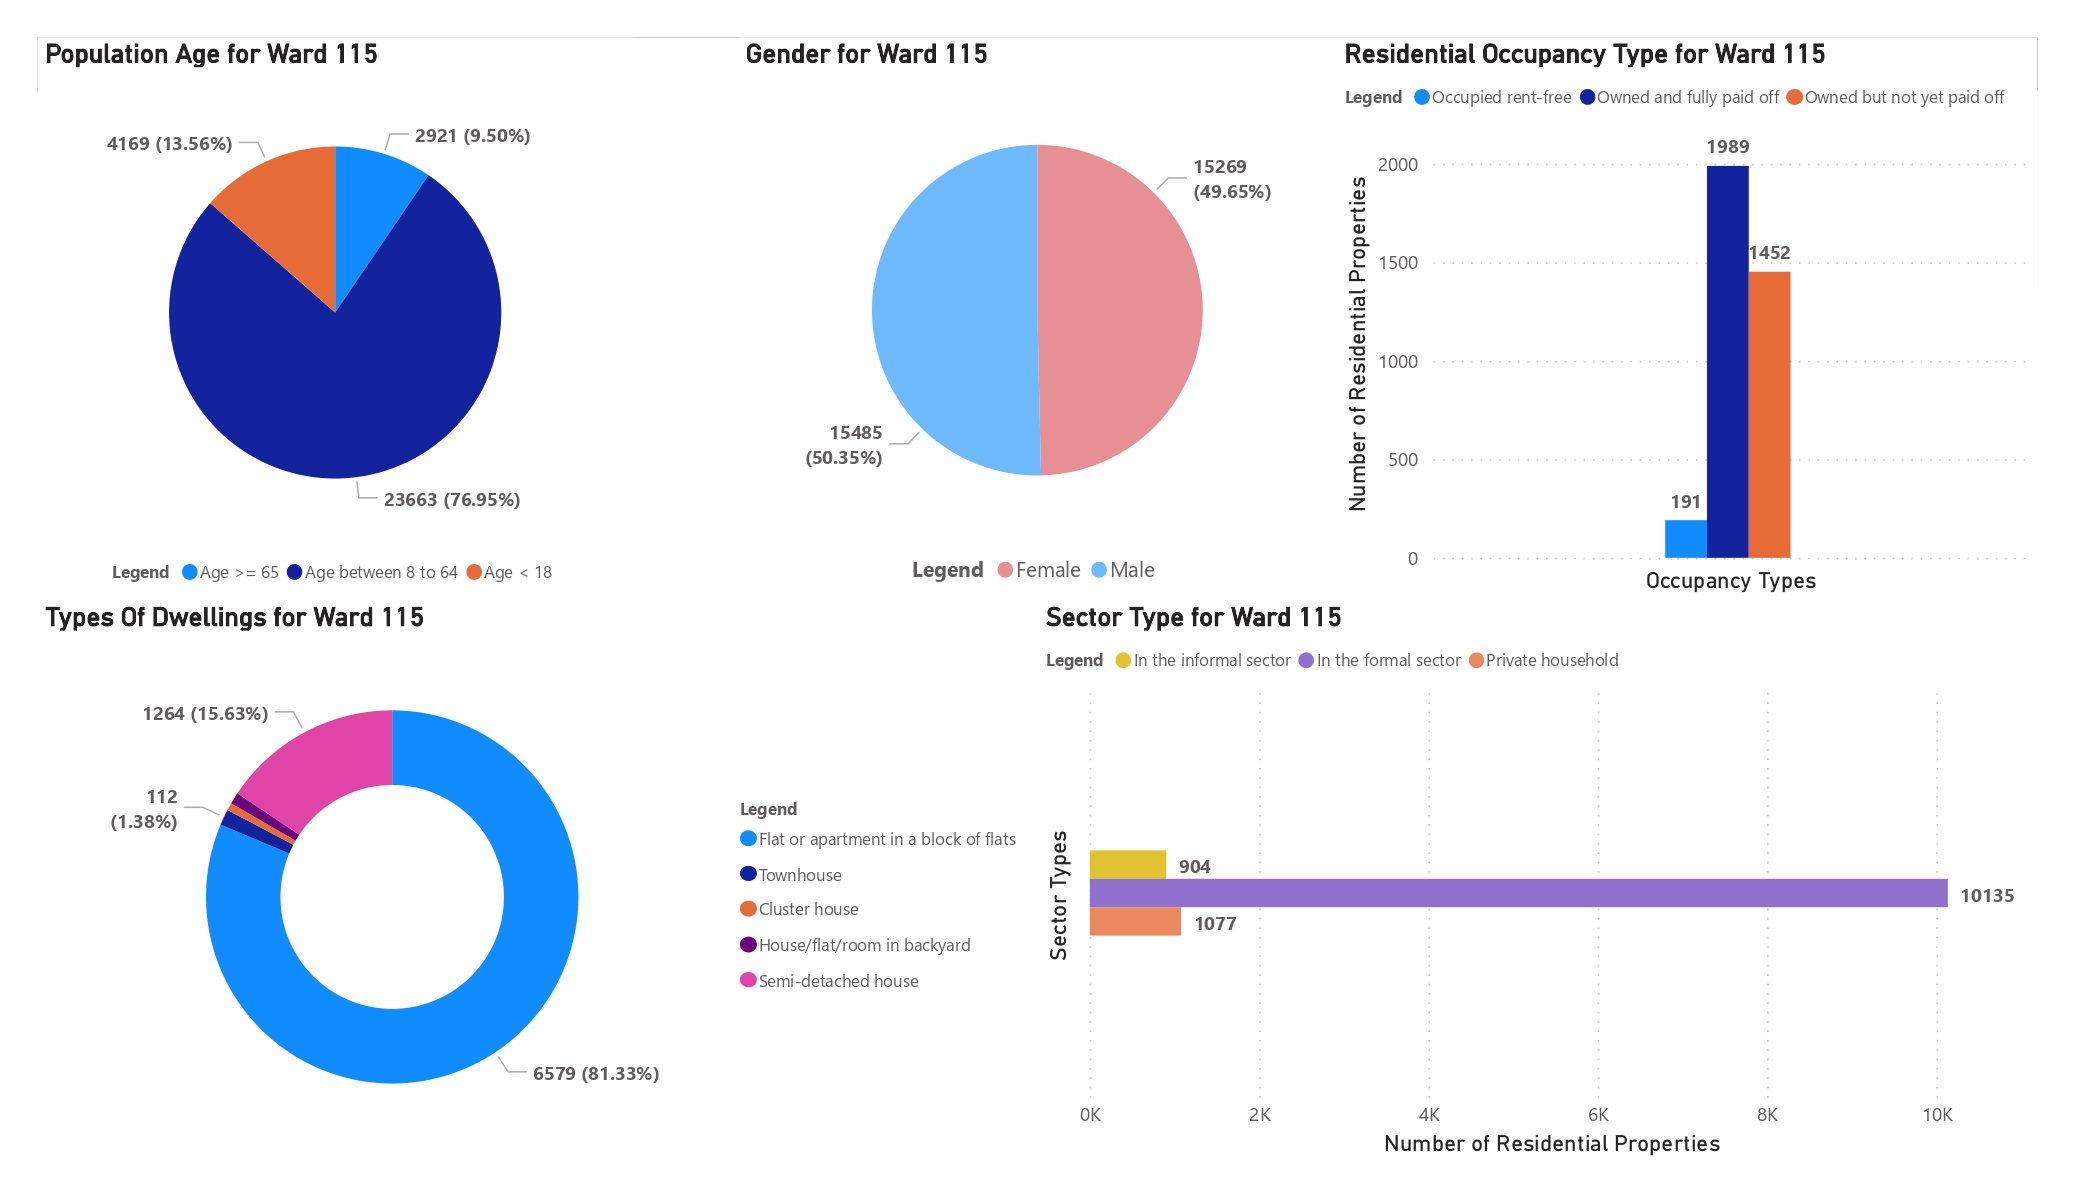

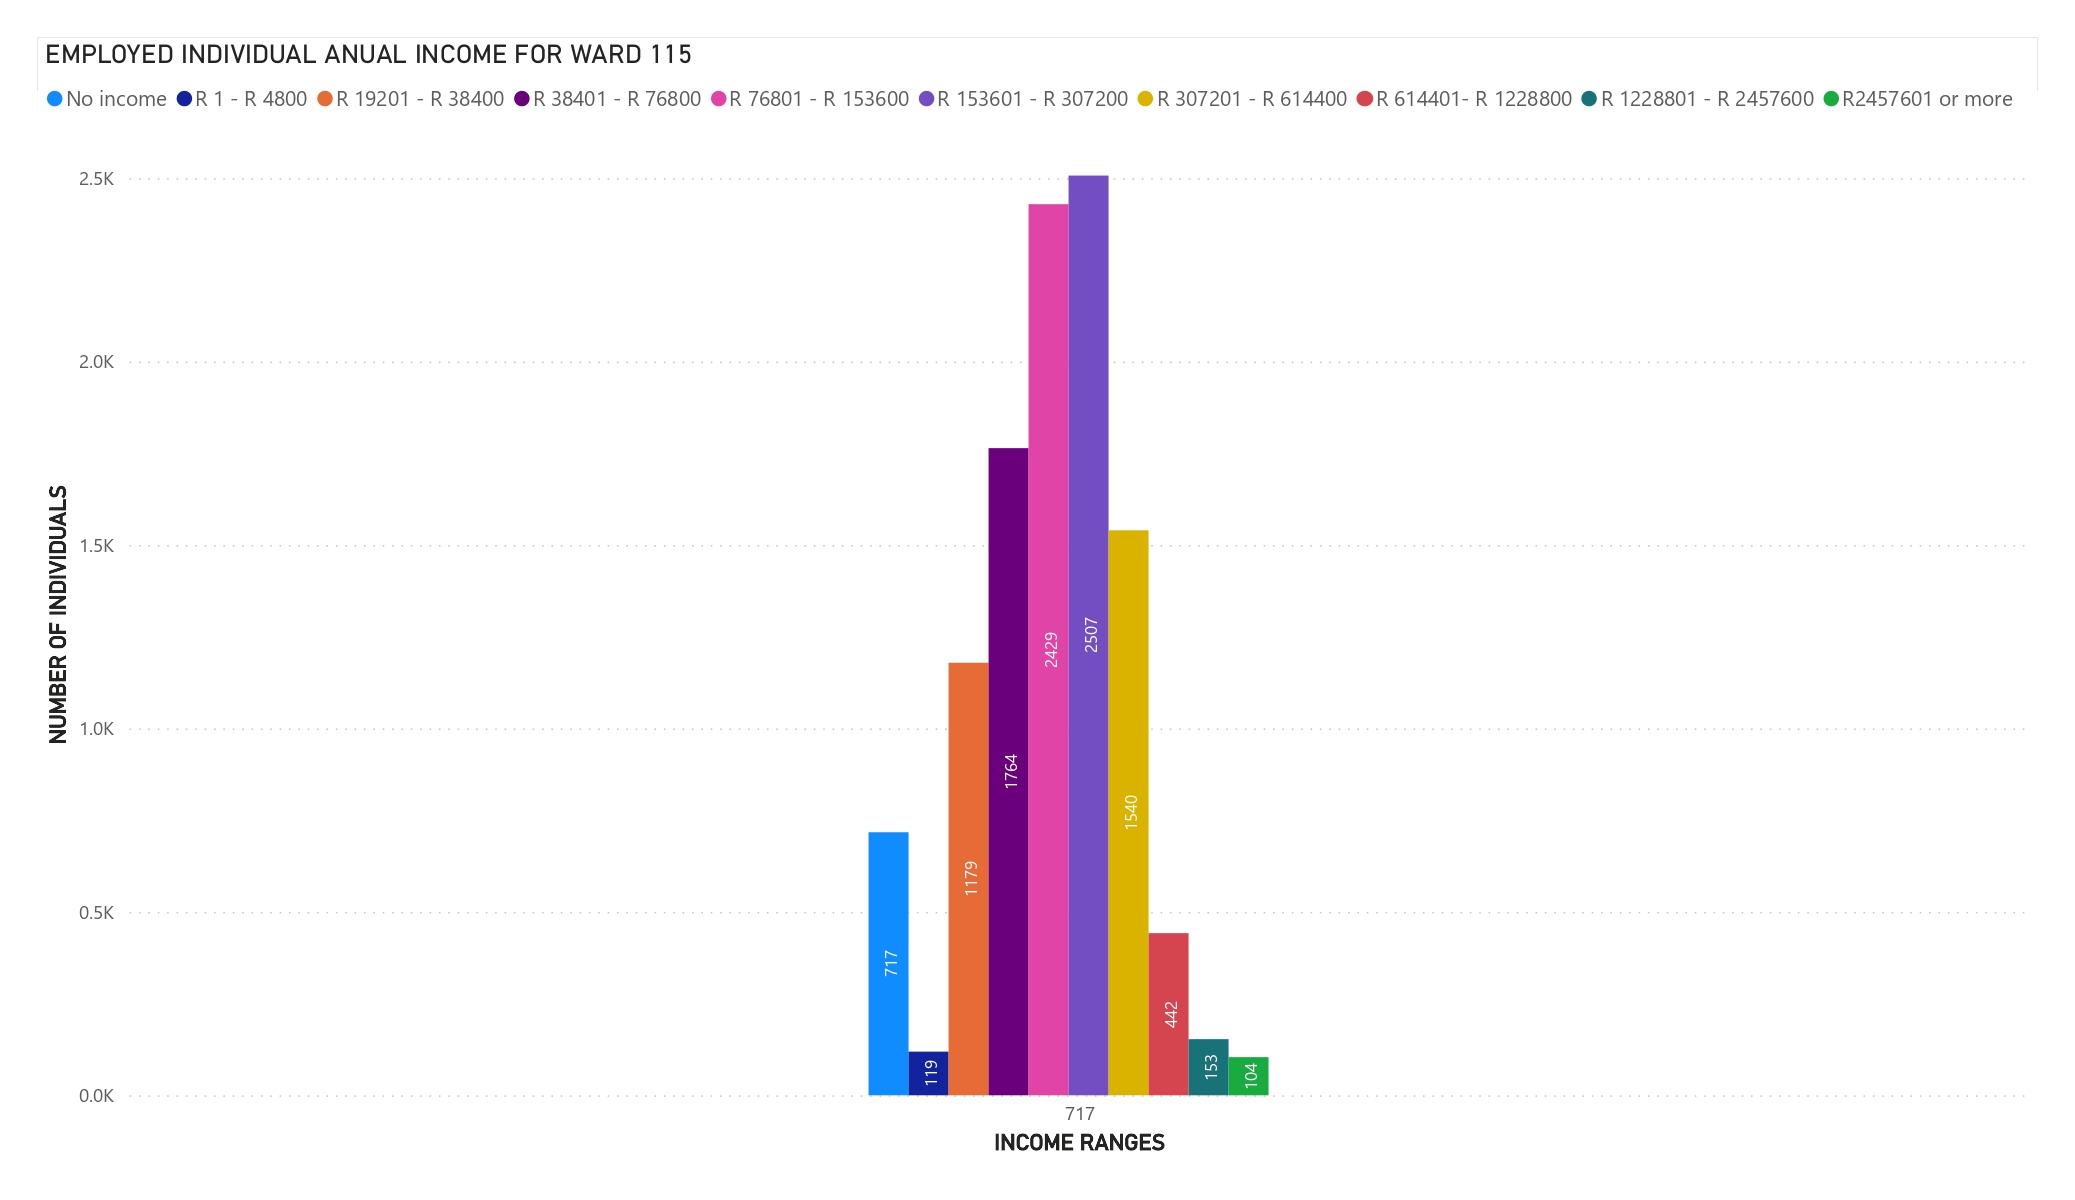